In [64]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/IDPS-dataset/UNSW_NB15_training-set.csv')
test = pd.read_csv('/content/drive/MyDrive/IDPS-dataset/UNSW_NB15_testing-set.csv')
data = pd.concat([train, test], axis=0)

In [ ]:
!pip install matplotlib --upgrade

In [24]:
data.head

<bound method NDFrame.head of             id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp       -   INT      2      0     496       0   
1            2  0.000008   udp       -   INT      2      0    1762       0   
2            3  0.000005   udp       -   INT      2      0    1068       0   
3            4  0.000006   udp       -   INT      2      0     900       0   
4            5  0.000010   udp       -   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_ds

In [65]:
# sep: ký tự ngăn cách các trường trong tệp CSV
# encoding: định dạng mã hóa của tệp CSV
features_explain = pd.read_csv("/content/drive/MyDrive/IDPS-dataset/NUSW-NB15_features.csv",sep=";", encoding='cp1252')
features_explain

,"No.,Name,Type ,Description"
0,"1,srcip,nominal,Source IP address"
1,"2,sport,integer,Source port number"
2,"3,dstip,nominal,Destination IP address"
3,"4,dsport,integer,Destination port number"
4,"5,proto,nominal,Transaction protocol"
5,"6,state,nominal,""Indicates to the state and it..."
6,"7,dur,Float,Record total duration"
7,"8,sbytes,Integer,Source to destination transac..."
8,"9,dbytes,Integer,Destination to source transac..."
9,"10,sttl,Integer,Source to destination time to ..."


In [26]:
# lấy danh sách các tên cột của các đặc trưng có kiểu dữ liệu là số
numerical_features = data.select_dtypes(include="number").columns.tolist()
display(numerical_features)

['id',
 'dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'label']

In [8]:
data.shape

(257675, 45)

In [ ]:
data.head

In [66]:
# lấy danh sách các tên cột của các đặc trưng có kiểu dữ liệu là các biến phân loại (categorical features) 
categorical_features = data.select_dtypes(exclude='number').columns.tolist()
categorical_features

['proto', 'service', 'state', 'attack_cat']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

# 4.IMPROVE FEATURE SET

In [67]:
# bỏ cột id vì không cần
data = data.drop(["id"], axis=1)

In [31]:
# kiểm tra có thiếu value k =>  K cần thêm missing values
data.isnull().values.any()

False

In [33]:
train.shape

(175341, 45)

In [34]:
test.shape

(175341, 45)

In [68]:
# Lấy giá trị "object" của cột
categorical_cols = train.select_dtypes(include=["object"]).columns
# Cột có giá trị "object" nếu giá trị ban đầu là dấu "-" thay thế  bằng giá trị "None"
data[categorical_cols] = data[categorical_cols].replace('-', "None")

In [36]:
data['service'].value_counts()


None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [37]:
# list cuộc tấn công
attack=data['attack_cat'].unique()

In [38]:
attack

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

 services most used by attackers 

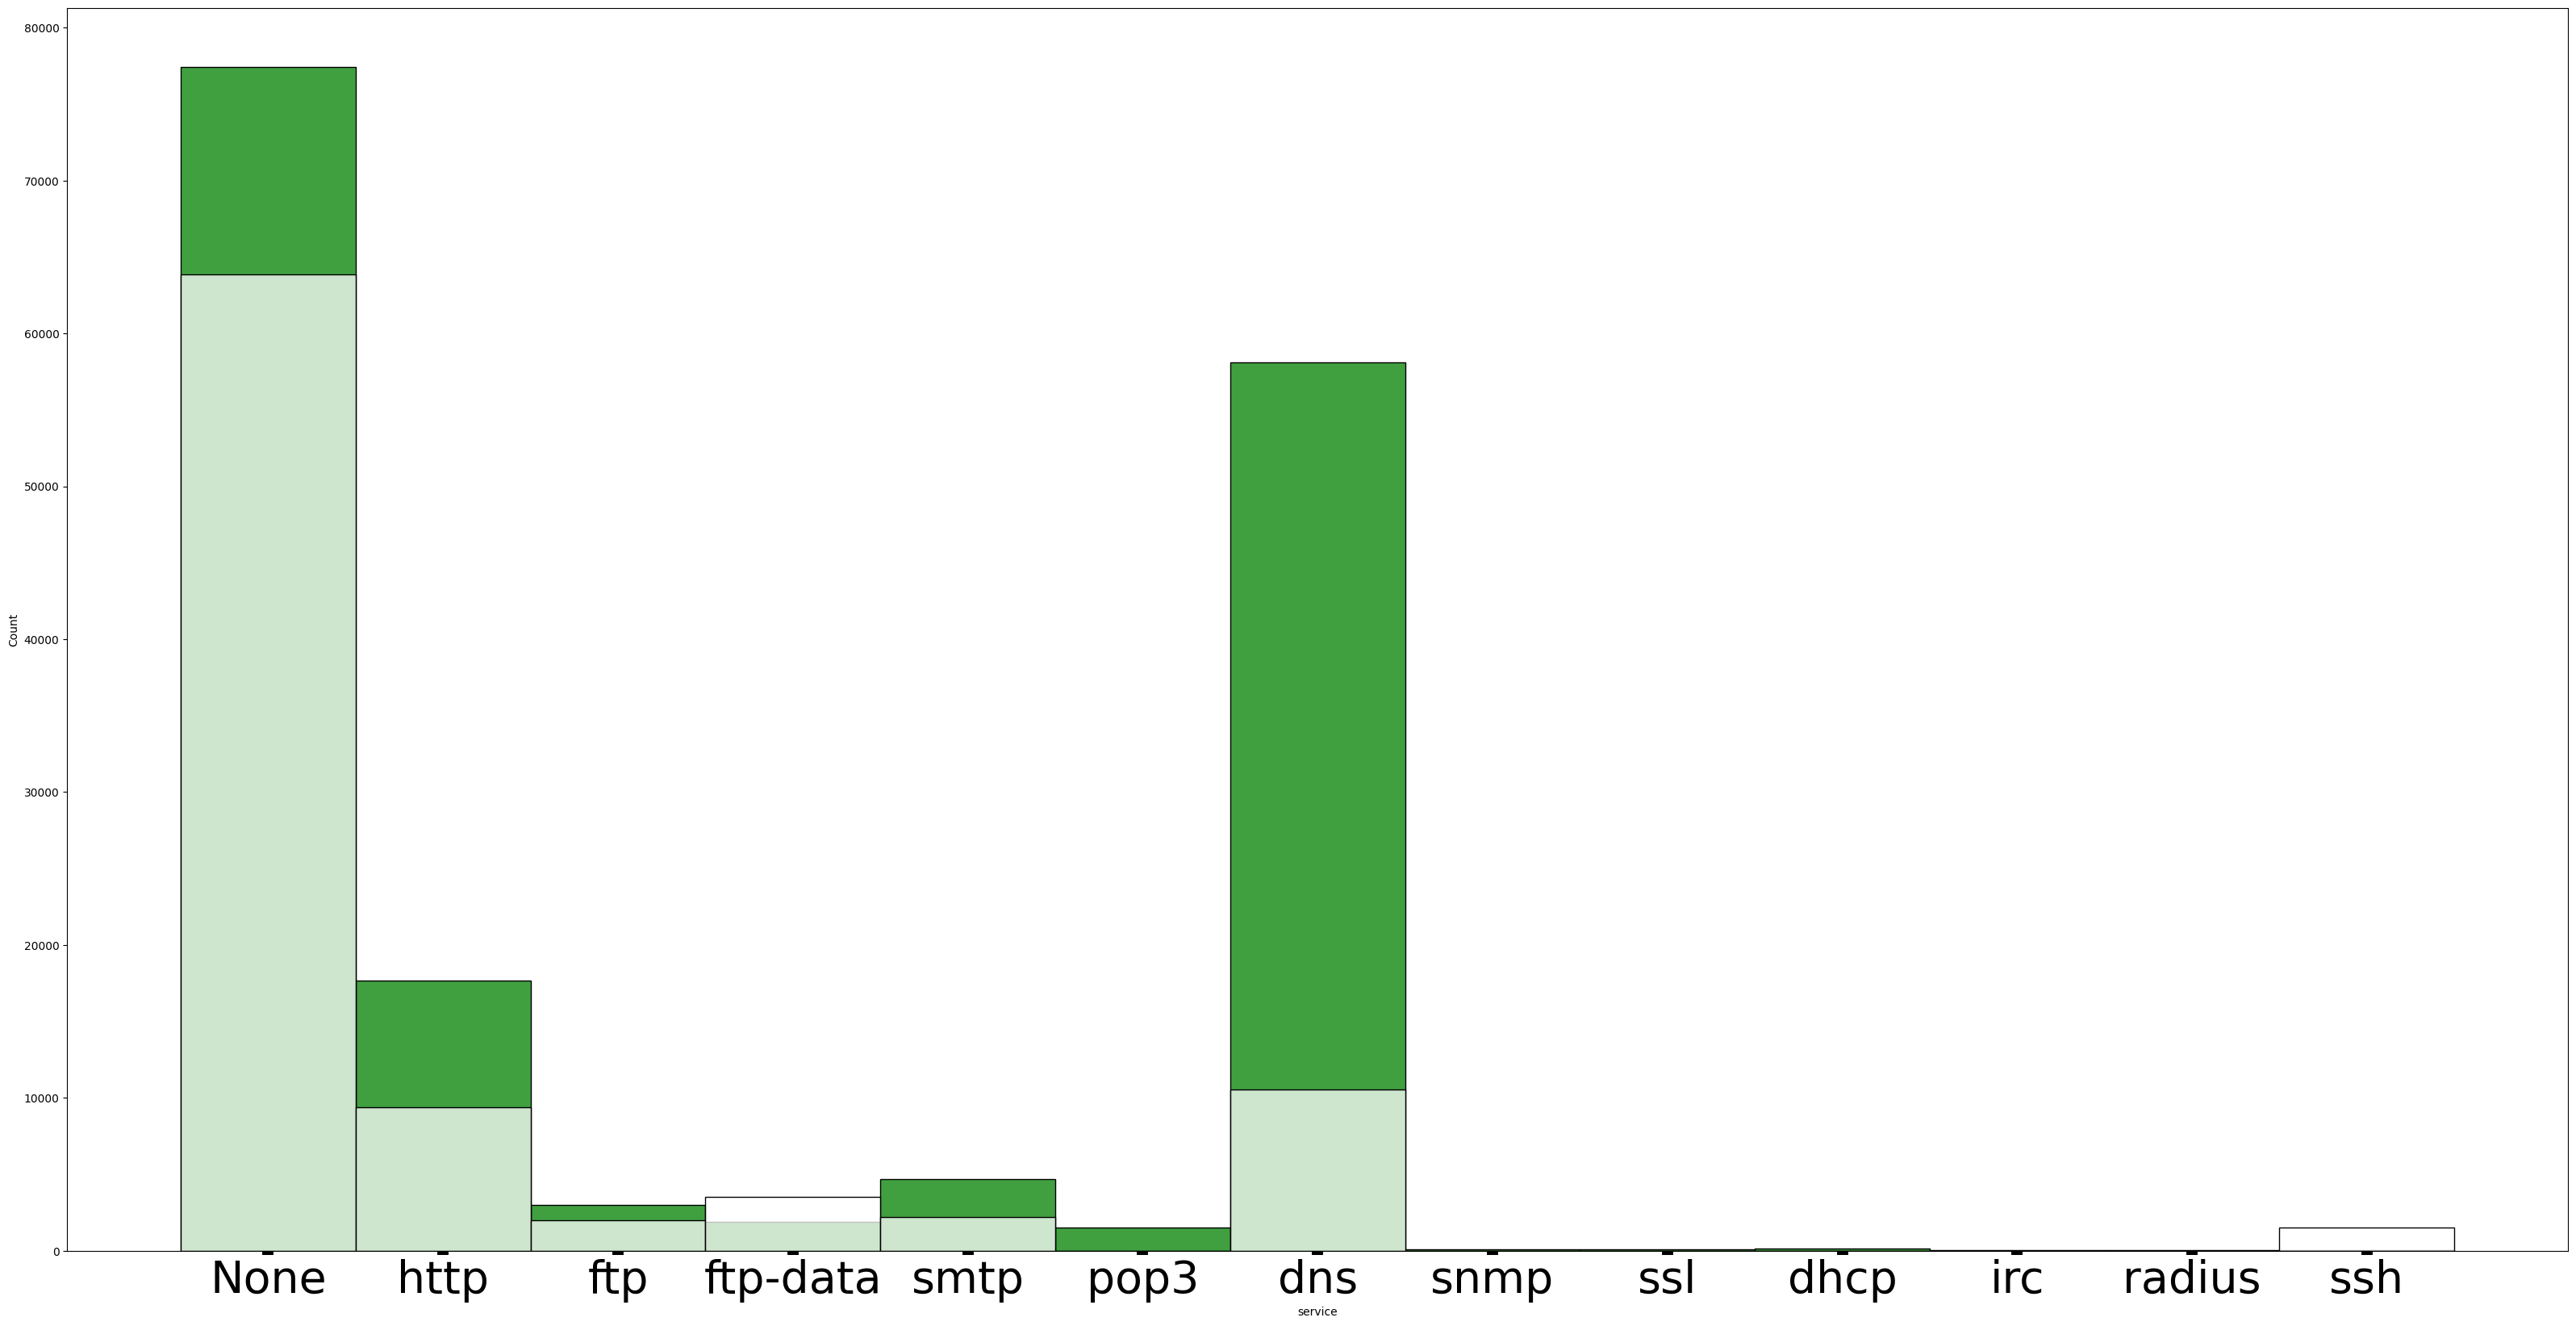

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# tạo một figure f với kích thước (40, 20)
f, axes = plt.subplots( figsize=(40, 20))
# tạo histogram cho  DataFrame data có nhãn label bằng 1, với cột "service" được lựa chọn làm đặc trưng
sns.histplot(data[data['label'] == 1]['service'], color='green')
# tương tự , có nhãn label bằng 0
sns.histplot(data[data['label'] ==0]['service'], color='white')
# quay các nhãn của trục x 45 độ
# width: chiều rộng của các đường viền xung quanh biểu đồ 
# kích thước của các nhãn trên trục tọa độ là 20.
axes.tick_params('x', labelrotation=0,width=10,labelsize=40)

most frequent attacks

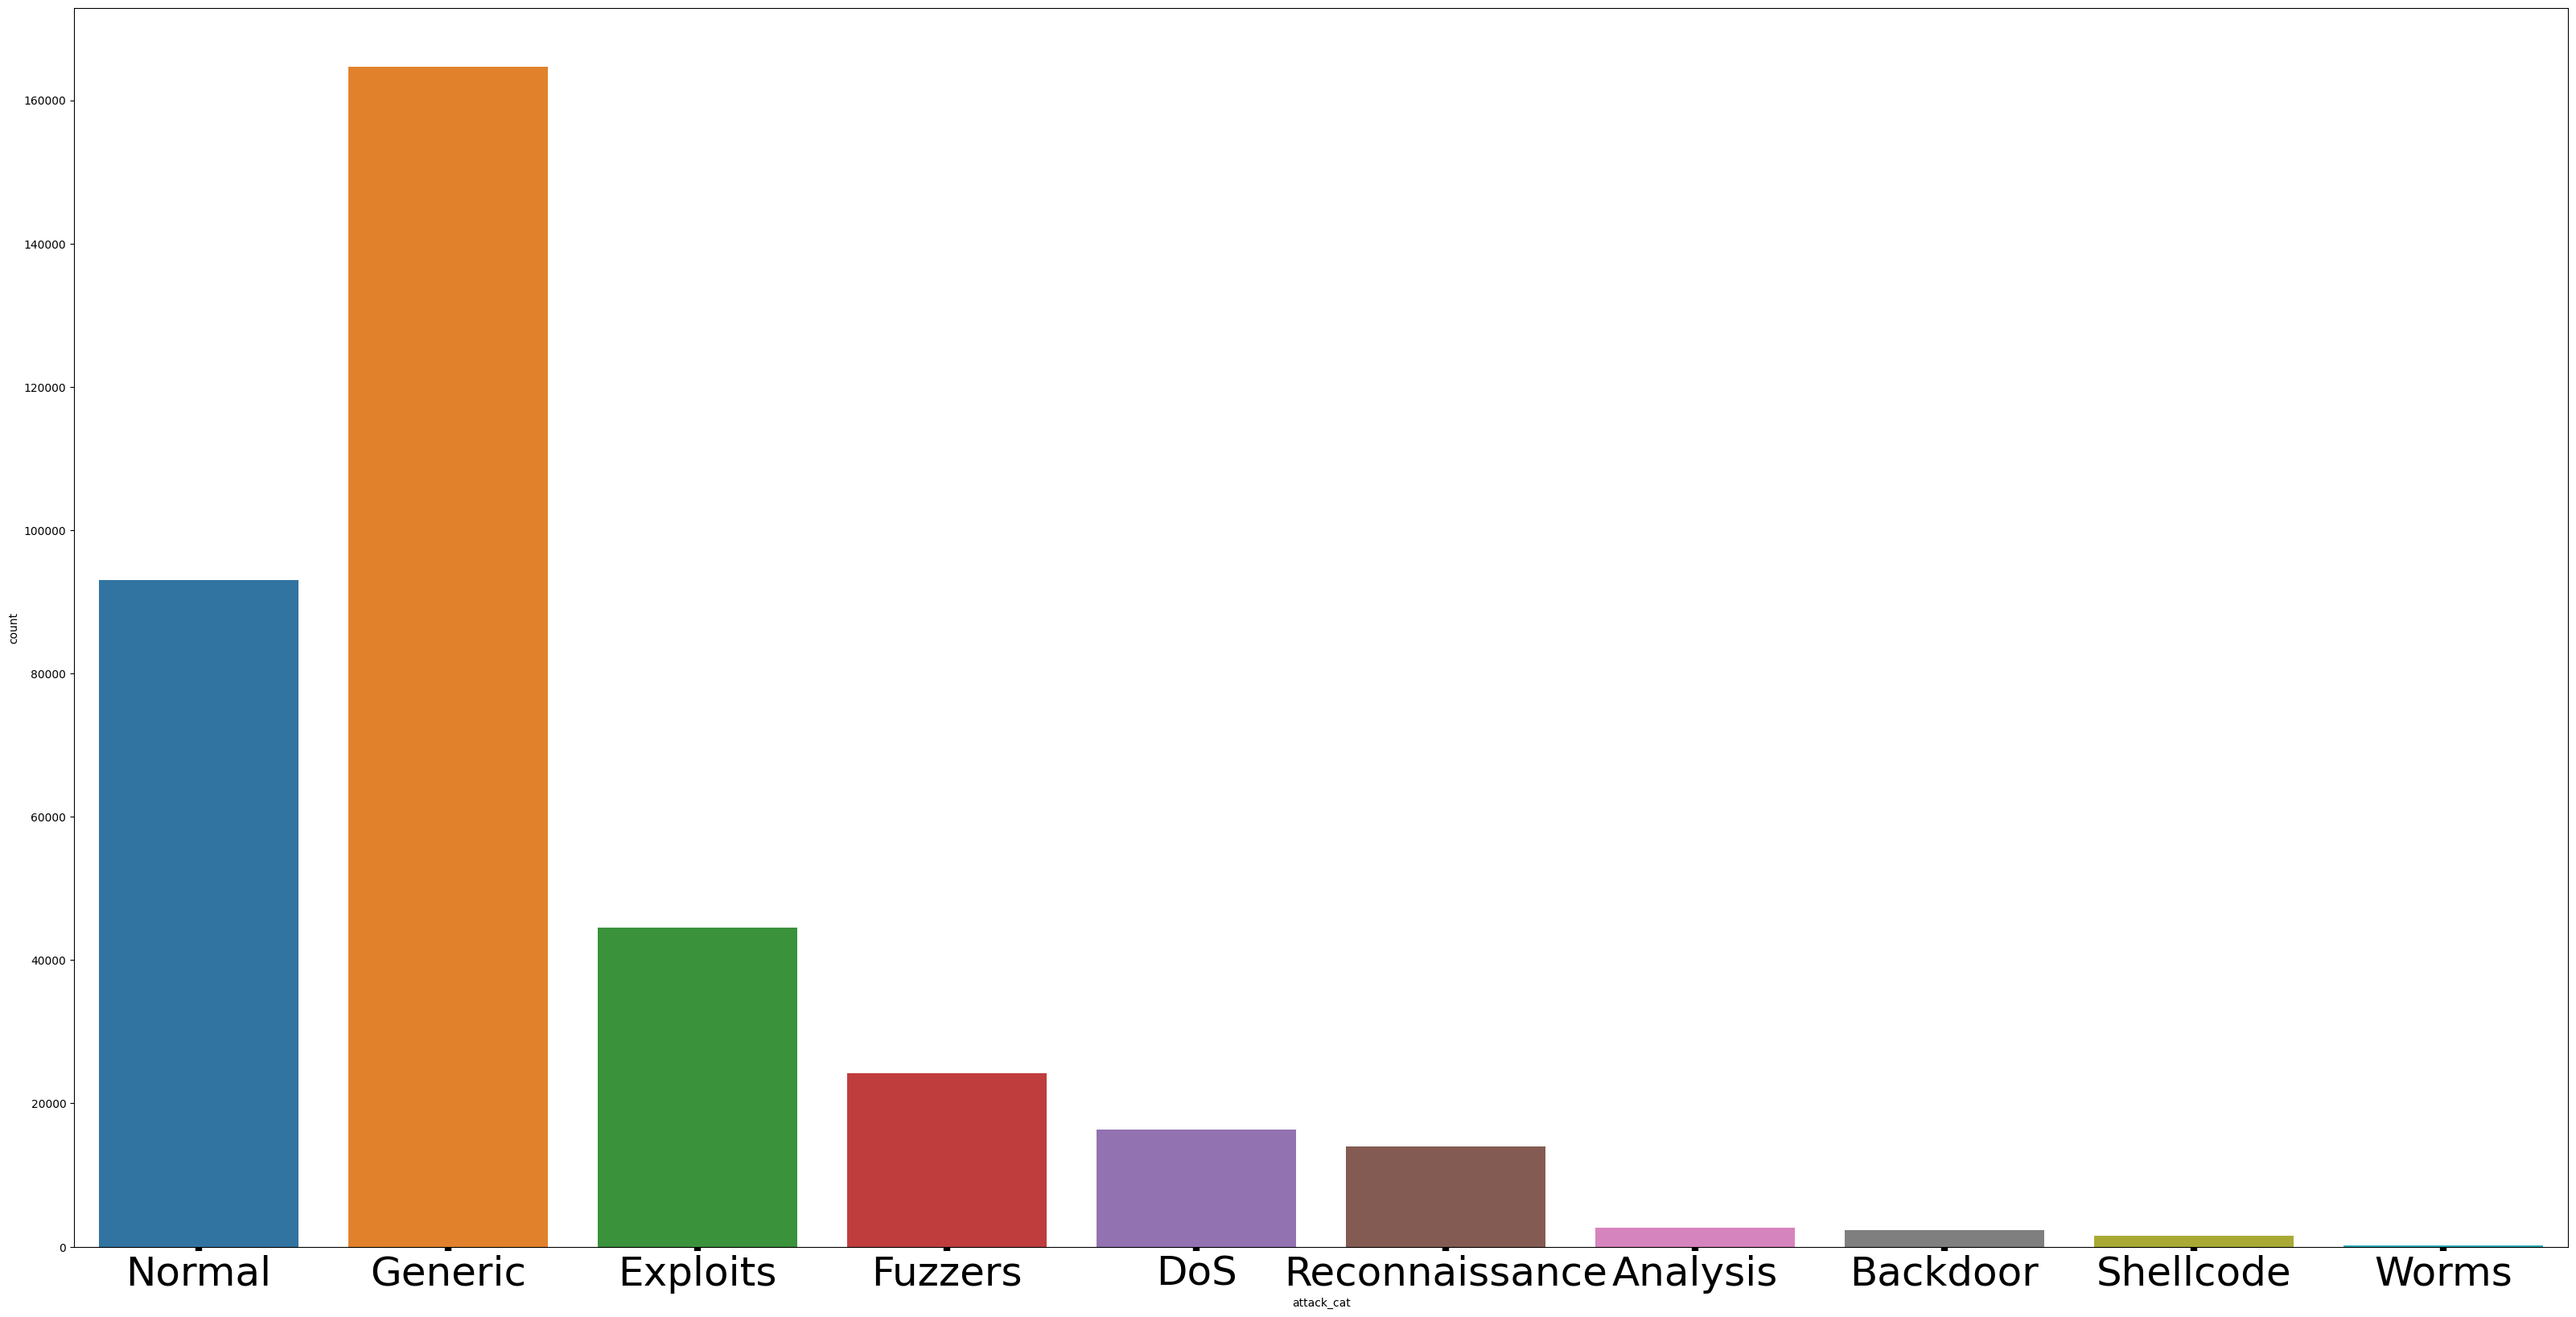

In [44]:
import seaborn as sns
f, axes = plt.subplots( figsize=(40, 20))
sns.countplot(x="label", data=data)
sns.countplot(x="attack_cat", data=data, order = data['attack_cat'].value_counts().index)
axes.tick_params('x', labelrotation=0,width=6,labelsize=36)

attacks count for most used protocols

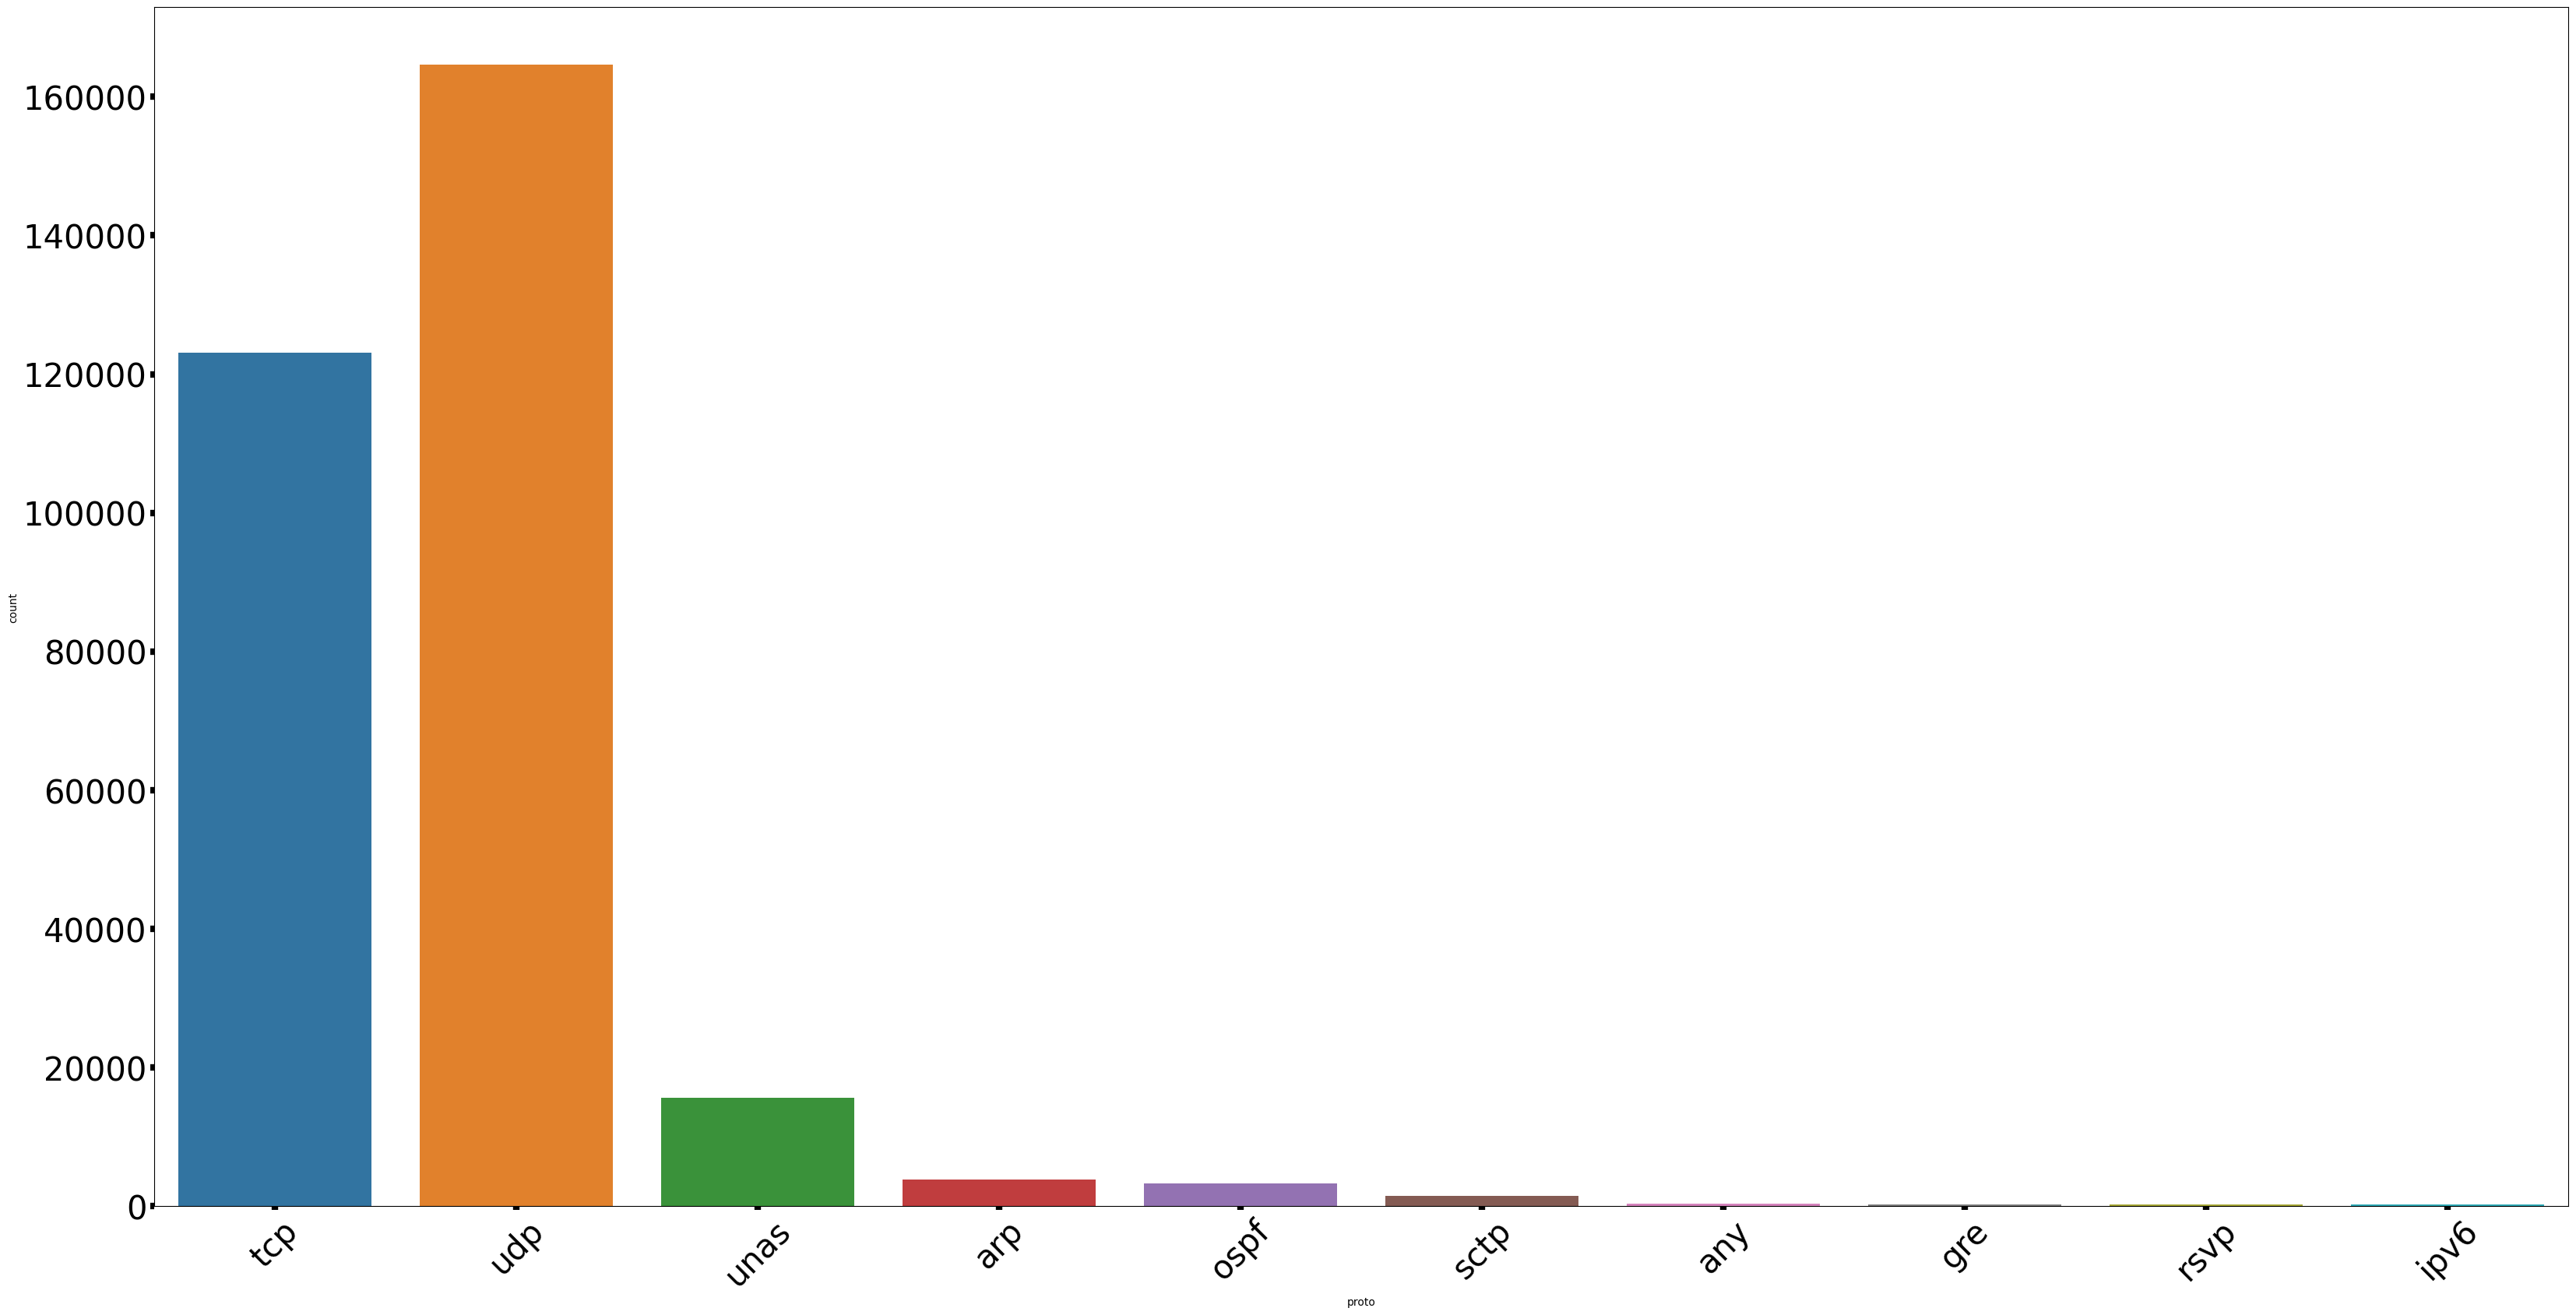

In [45]:
import seaborn as sns
f, axes = plt.subplots( figsize=(40, 20))
sns.countplot(x="label", data=data)
sns.countplot(x="proto", data=data, order = data['proto'].value_counts()[:10].index)
axes.tick_params('x', labelrotation=45,width=6,labelsize=30)
axes.tick_params('y',width=6,labelsize=30)

In [46]:
data['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [47]:
data["label"].value_counts()

1    164673
0     93000
Name: label, dtype: int64

In [48]:
data["attack_cat"].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

# **5.Feature Encoding**

Vì hầu hết các kĩ thuật không thể xử lý categorical data

In [69]:
l1 = data[["proto"]]
l2 = data[["service"]]
l3 = data[["state"]]
l4=data[['attack_cat']]

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lb_encoder1 =  LabelEncoder()
l1_ = lb_encoder1.fit_transform(l1)

lb_encoder2 =   LabelEncoder()
l2_ = lb_encoder2.fit_transform(l2)

lb_encoder3 = LabelEncoder()
l3_= lb_encoder3.fit_transform(l3)

lb_encoder4 =   LabelEncoder()
l4_= lb_encoder4.fit_transform(l4)

lb_encoder5 =   LabelEncoder()


data["proto"] = l1_
data["service"] = l2_
data["state"] = l3_
data["attack_cat"]=l4_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [51]:
crr_loan = data.corr()
crr_loan["attack_cat"].sort_values(ascending=False)

attack_cat           1.000000
dload                0.208868
proto                0.183783
swin                 0.137248
dwin                 0.121688
is_sm_ips_ports      0.096422
stcpb                0.095716
dtcpb                0.094587
ct_srv_src           0.094502
ct_dst_ltm           0.093981
sinpkt               0.091132
ct_srv_dst           0.091042
dmean                0.086860
ct_src_dport_ltm     0.049673
ct_src_ltm           0.049067
ct_dst_src_ltm       0.047498
dpkts                0.023630
ct_dst_sport_ltm     0.022948
dloss                0.016918
dbytes               0.012388
dinpkt               0.012317
response_body_len    0.001522
sjit                -0.000912
djit                -0.003805
spkts               -0.013261
synack              -0.021046
sloss               -0.033507
ct_ftp_cmd          -0.038460
is_ftp_login        -0.038784
tcprtt              -0.040747
sbytes              -0.041092
trans_depth         -0.042492
ackdat              -0.057948
service   

# 6.FEATURE MATRIX
+
# 7.Training set represent 70% and testing set represent 30% of the data

In [71]:
from sklearn.model_selection import train_test_split

# target_data : là cái cần dự đoán  (đầu ra)
target_data=data['attack_cat'].copy()
# Bỏ cột  (đầu ra)  thì còn lại là (đầu vào)
data=data.drop(['attack_cat'],axis=1)
# 70-30 
X_train, X_test, y_train, y_test = train_test_split(data,target_data ,test_size=0.30, shuffle = True, random_state = 43)
# tiếp tục chia 80-20 : tránh overfitting (tập này sẽ đc sử dụng để đánh giá mô hình)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 42)

In [53]:
X_train.shape

(144296, 43)

In [72]:
target_names = [
    'Normal',
    'Generic',
    'Exploits',
    'Fuzzers',
    'DoS',
    'Reconnaissance',   
    'Analysis',          
    'Backdoor',
    'Shellcode',
    'Worms'
]

# Sau khi chuẩn bị xong data rồi thì train thôi

#2.FEATURE EXTRACTION WHILE TRAINING

#3. USE THAT FEATURE SET FOR TRAINNING

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Dropout, LSTM, MaxPooling1D
from keras.models import Sequential

# Reshape data to fit the Conv1D layer      / feature matrix
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(LSTM(units=64, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(units=10, activation='softmax'))

# Compile the model
model_cnn_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping and model checkpoint callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model_cnn_lstm', monitor='val_loss', save_best_only=True)]

# Fit the model
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=30, callbacks=callbacks)


Epoch 1/20
4808/4810 [============================>.] - ETA: 0s - loss: 160149.6562 - accuracy: 0.2594

4810/4810 [==============================] - 171s 24ms/step - loss: 160087.5312 - accuracy: 0.2594 - val_loss: 50.2907 - val_accuracy: 0.1828
Epoch 2/20
4809/4810 [============================>.] - ETA: 0s - loss: 144.5527 - accuracy: 0.3446

4810/4810 [==============================] - 108s 22ms/step - loss: 144.5269 - accuracy: 0.3446 - val_loss: 1.6743 - val_accuracy: 0.3626
Epoch 3/20
4810/4810 [==============================] - 104s 22ms/step - loss: 73.2839 - accuracy: 0.3858 - val_loss: 7.2104 - val_accuracy: 0.4235
Epoch 4/20
4810/4810 [==============================] - ETA: 0s - loss: 9.4889 - accuracy: 0.4706

4810/4810 [==============================] - 108s 23ms/step - loss: 9.4889 - accuracy: 0.4706 - val_loss: 1.4457 - val_accuracy: 0.5468
Epoch 5/20
4809/4810 [============================>.] - ETA: 0s - loss: 70.1273 - accuracy: 0.5046

4810/4810 [==============================] - 104s 22ms/step - loss: 70.1149 - accuracy: 0.5046 - val_loss: 1.3346 - val_accuracy: 0.5526
Epoch 6/20
4808/4810 [============================>.] - ETA: 0s - loss: 5.5727 - accuracy: 0.5239

4810/4810 [==============================] - 109s 23ms/step - loss: 5.5711 - accuracy: 0.5239 - val_loss: 1.2612 - val_accuracy: 0.5854
Epoch 7/20
4810/4810 [==============================] - ETA: 0s - loss: 3.2969 - accuracy: 0.5509

4810/4810 [==============================] - 105s 22ms/step - loss: 3.2969 - accuracy: 0.5509 - val_loss: 1.2457 - val_accuracy: 0.5886
Epoch 8/20
4809/4810 [============================>.] - ETA: 0s - loss: 11.3586 - accuracy: 0.5960

4810/4810 [==============================] - 108s 22ms/step - loss: 11.3568 - accuracy: 0.5960 - val_loss: 1.0560 - val_accuracy: 0.6319
Epoch 9/20
4809/4810 [============================>.] - ETA: 0s - loss: 390.1966 - accuracy: 0.6091

4810/4810 [==============================] - 111s 23ms/step - loss: 390.1265 - accuracy: 0.6091 - val_loss: 1.0021 - val_accuracy: 0.6539
Epoch 10/20
4808/4810 [============================>.] - ETA: 0s - loss: 42.1271 - accuracy: 0.6400

4810/4810 [==============================] - 104s 22ms/step - loss: 42.1112 - accuracy: 0.6400 - val_loss: 0.9486 - val_accuracy: 0.6701
Epoch 11/20
4809/4810 [============================>.] - ETA: 0s - loss: 1.1829 - accuracy: 0.6630

4810/4810 [==============================] - 103s 21ms/step - loss: 1.1828 - accuracy: 0.6630 - val_loss: 0.8377 - val_accuracy: 0.7046
Epoch 12/20
4810/4810 [==============================] - ETA: 0s - loss: 15.1253 - accuracy: 0.6811

4810/4810 [==============================] - 106s 22ms/step - loss: 15.1253 - accuracy: 0.6811 - val_loss: 0.8185 - val_accuracy: 0.7038
Epoch 13/20
4810/4810 [==============================] - ETA: 0s - loss: 37.4717 - accuracy: 0.6769

4810/4810 [==============================] - 104s 22ms/step - loss: 37.4717 - accuracy: 0.6769 - val_loss: 0.7585 - val_accuracy: 0.7266
Epoch 14/20
4808/4810 [============================>.] - ETA: 0s - loss: 1.5213 - accuracy: 0.7028

4810/4810 [==============================] - 107s 22ms/step - loss: 1.5211 - accuracy: 0.7028 - val_loss: 0.7271 - val_accuracy: 0.7341
Epoch 15/20
4810/4810 [==============================] - ETA: 0s - loss: 7.8913 - accuracy: 0.6984

4810/4810 [==============================] - 107s 22ms/step - loss: 7.8913 - accuracy: 0.6984 - val_loss: 0.7063 - val_accuracy: 0.7400
Epoch 16/20
4810/4810 [==============================] - 103s 21ms/step - loss: 6.2831 - accuracy: 0.6994 - val_loss: 0.7470 - val_accuracy: 0.7295
Epoch 17/20
4810/4810 [==============================] - 104s 22ms/step - loss: 121.3430 - accuracy: 0.6998 - val_loss: 0.7378 - val_accuracy: 0.7259


history: là kết quả của quá trình huấn luyện mô hình, chứa các thông tin như accuracy, loss của từng epoch.

model: tên của mô hình, sử dụng để đặt tiêu đề cho biểu đồ.

Hàm sử dụng thư viện matplotlib để vẽ hai biểu đồ trên cùng một figure, mỗi biểu đồ sẽ hiển thị accuracy hoặc loss của tập huấn luyện và tập kiểm định. Các điểm được vẽ bằng các ký hiệu và màu khác nhau để phân biệt. Hàm cũng đặt tiêu đề và gắn chú thích cho biểu đồ.

In [58]:
import matplotlib.pyplot as plt

def plot_training_vs_validation(history,model):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].plot(history.history['accuracy'],'bd--', label = "train_acc")
  ax[0].plot(history.history['val_accuracy'],'rd--', label = "val_acc")
  ax[1].plot(history.history['loss'],'g*--', label = "train_loss")
  ax[1].plot(history.history['val_loss'],'c*--', label = "val_loss")
  ax[0].set_title('Training vs Validation [accuracy]--'+model)
  ax[1].set_title('Training vs Validation [loss]--'+model)
  ax[0].legend()
  ax[1].legend()
  ax[0].set_xlabel('Epochs')
  ax[1].set_xlabel('Epochs')
  ax[0].set_ylabel('Accuracy')
  ax[1].set_ylabel('Loss')
  plt.tight_layout()
  plt.show()


In [77]:
import numpy as np

# 8.WEIGHT SET

In [79]:
weights_conv1d = model_cnn_lstm.layers[0].get_weights()
weights_lstm = model_cnn_lstm.layers[3].get_weights()

 trọng số của layer Conv1D đầu tiên 

In [80]:
weights_conv1d

[array([[[ 1.91245452e-01, -1.23946425e-02,  1.30026668e-01,
          -2.84628332e-01, -1.03682570e-01, -1.43394619e-02,
           4.44809673e-03,  1.09731413e-01, -1.43427014e-01,
           2.04311863e-01, -5.14238440e-02,  1.57404810e-01,
          -4.99028265e-02, -3.10513198e-01, -2.86975235e-01,
          -1.40735216e-03,  1.15179375e-01, -2.17673294e-02,
          -2.16851346e-02, -6.63210545e-03, -9.68987793e-02,
           8.58731493e-02, -3.97514291e-02, -3.15589048e-02,
          -2.83666342e-01, -2.71020131e-03, -1.47704497e-01,
           5.77118248e-02, -4.00790572e-03, -5.48227727e-02,
           3.92782725e-02,  6.07579611e-02, -1.61257625e-01,
          -1.08215176e-01, -2.75502324e-01, -4.46655691e-01,
          -2.35094622e-01,  1.30046308e-01, -4.22031283e-02,
           1.11963436e-01, -2.33989805e-02, -1.84359506e-01,
          -2.36527205e-01, -2.05375940e-01,  9.61503237e-02,
          -2.59536475e-01, -2.39293367e-01, -2.39142790e-01,
           1.34336010e-0

In [81]:
#layer LSTM thứ tư trong mô hình đã train
weights_lstm

[array([[-4.39370051e-02, -2.64712423e-02, -5.07977545e-01, ...,
         -1.85678691e-01,  1.34765245e-02, -1.02010772e-01],
        [ 3.02543920e-02, -2.45075077e-01,  7.06494391e-01, ...,
          6.36359006e-02, -6.02928177e-03, -1.43108442e-01],
        [ 2.54406452e-01, -3.70510891e-02,  3.41981836e-02, ...,
         -2.59409755e-01,  9.64288861e-02, -5.53352609e-02],
        ...,
        [-1.40375160e-02, -1.46659657e-01, -1.72042951e-01, ...,
         -2.42926937e-04, -8.52973238e-02,  9.00803432e-02],
        [ 1.92314297e-01, -3.87890309e-01,  9.63849872e-02, ...,
         -1.14504807e-01, -2.86383957e-01,  6.64190724e-02],
        [-1.11563832e-01, -1.12620153e-01,  1.84586495e-01, ...,
         -1.89049989e-01, -3.68775845e-01, -6.15444109e-02]], dtype=float32),
 array([[ 0.10211069, -0.09608721,  0.24111994, ..., -0.11394291,
          0.15307374,  0.07583054],
        [ 0.10418605,  0.03807932, -0.0116498 , ..., -0.07335135,
         -0.00493853, -0.03368032],
        [-

# **9.INSTRUTION DETECTION BY CNN**
+
# 10.**RESULTS**

In [78]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model_cnn_lstm.predict(X_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))


2416/2416 [==============================] - 15s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       780
           1       0.00      0.00      0.00       727
           2       0.34      0.34      0.34      4953
           3       0.53      0.70      0.60     13294
           4       0.42      0.14      0.21      7139
           5       0.94      0.96      0.95     17700
           6       0.80      0.93      0.86     27941
           7       0.62      0.29      0.40      4272
           8       0.00      0.00      0.00       440
           9       0.00      0.00      0.00        56

    accuracy                           0.73     77302
   macro avg       0.36      0.34      0.34     77302
weighted avg       0.69      0.73      0.70     77302



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 vẽ biểu đồ đánh giá kết quả huấn luyện và kiểm định (validation) của một mô hình học máy

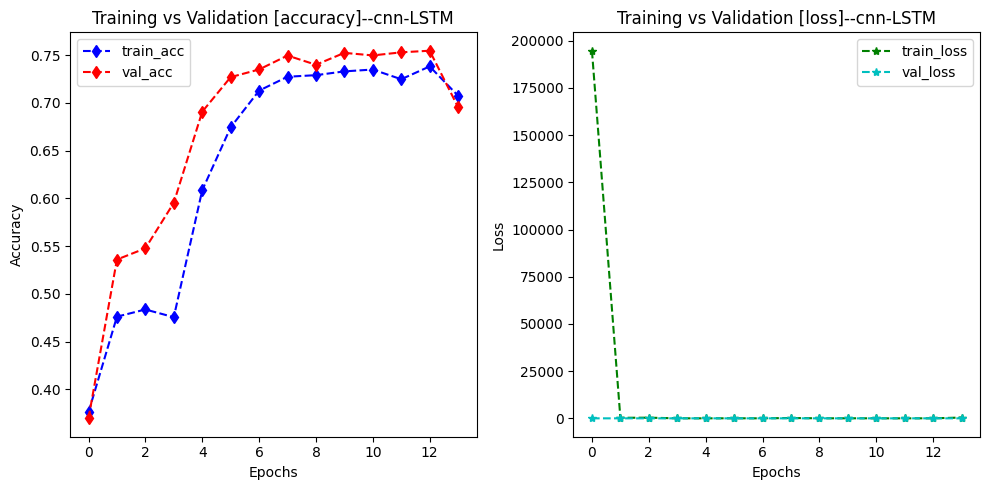

In [62]:
plot_training_vs_validation(history_cnn_lstm,"cnn-LSTM")